## CS22B1093

___________________

## Data Preparation

In [1]:
import numpy as np 
import pandas as pd

In [2]:
dataset = pd.read_csv('Dataset.csv') # dataframe of user ratings
titles = pd.read_csv('Movie_Id_Titles.csv') # dataframe of movie titles

In [3]:
dataset.head() # 1st 5 rows of dataset

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
titles.head() # 1st 5 rows of titles

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [5]:
print(dataset.shape) # dimensions of dataset
print(titles.shape) # dimensions of titles

(100003, 4)
(1682, 2)


In [6]:
dataset.isnull().sum() #Number of null values present in Dataset.csv

user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64

In [7]:
titles.isnull().sum() #Number of null values present in Movie_Id_Titles.csv

item_id    0
title      0
dtype: int64

In [8]:
dataset.duplicated().sum() #duplicates in Dataset.csv

0

In [9]:
titles.duplicated().sum() #duplicates in Movie_Id_Titles.csv

0

In [10]:
unique_users = len(dataset.user_id.unique())
print(f"The number of uniques users in the dataset is : {unique_users}") #Number of unique users in the dataset

The number of uniques users in the dataset is : 944


In [11]:
unique_titles = len(titles.item_id.unique())
print(f"The number of uniques movie titles in the dataset is : {unique_titles}") #Number of unique movie titles in the dataset

The number of uniques movie titles in the dataset is : 1682


-------------------------------------------------

## Popularity Based Recommender System

In [12]:
merged_dataset = dataset.merge(titles, on='item_id') # Merging the two dataframes on item_id
# print(merged)
print(merged_dataset.head()) # 1st 5 rows of merged dataframe
print(merged_dataset.shape) # dimensions of merged dataframe

num_rating_df = merged_dataset.groupby('title').count()['rating'].reset_index() # Grouping by title and counting ratings
num_rating_df.rename(columns={'rating': 'num_ratings'}, inplace=True) # Renaming the column
print(num_rating_df.head()) # 1st 5 rows of num_rating_df

   user_id  item_id  rating  timestamp                            title
0        0       50       5  881250949                 Star Wars (1977)
1        0      172       5  881250949  Empire Strikes Back, The (1980)
2        0      133       1  881250949        Gone with the Wind (1939)
3      196      242       3  881250949                     Kolya (1996)
4      186      302       3  891717742         L.A. Confidential (1997)
(100003, 5)
                       title  num_ratings
0  'Til There Was You (1997)            9
1               1-900 (1994)            5
2      101 Dalmatians (1996)          109
3        12 Angry Men (1957)          125
4                 187 (1997)           41


In [13]:
avg_rating_df = merged_dataset.groupby('title').mean()['rating'].reset_index() # Grouping by title and counting ratings
avg_rating_df.rename(columns={'rating': 'avg_ratings'}, inplace=True) # Renaming the column
print(avg_rating_df.head()) # 1st 5 rows of num_rating_df

                       title  avg_ratings
0  'Til There Was You (1997)     2.333333
1               1-900 (1994)     2.600000
2      101 Dalmatians (1996)     2.908257
3        12 Angry Men (1957)     4.344000
4                 187 (1997)     3.024390


In [14]:
popular_df = num_rating_df.merge(avg_rating_df, on='title')
print(popular_df.head())

                       title  num_ratings  avg_ratings
0  'Til There Was You (1997)            9     2.333333
1               1-900 (1994)            5     2.600000
2      101 Dalmatians (1996)          109     2.908257
3        12 Angry Men (1957)          125     4.344000
4                 187 (1997)           41     3.024390


In [15]:
popular_df = popular_df[popular_df['num_ratings'] >= 250].sort_values('avg_ratings', ascending=False).head(10)
popular_df = popular_df.rename(columns={
    'title': 'Movie Title',
    'num_ratings': 'Number of Ratings',
    'avg_ratings': 'Average Ratings'
})
print(popular_df)
print(popular_df.shape)

                                 Movie Title  Number of Ratings  \
1281                 Schindler's List (1993)                298   
1317        Shawshank Redemption, The (1994)                283   
1572              Usual Suspects, The (1995)                267   
1398                        Star Wars (1977)                584   
1102  One Flew Over the Cuckoo's Nest (1975)                264   
1329        Silence of the Lambs, The (1991)                390   
612                    Godfather, The (1972)                413   
1205          Raiders of the Lost Ark (1981)                420   
1500                          Titanic (1997)                350   
456          Empire Strikes Back, The (1980)                368   

      Average Ratings  
1281         4.466443  
1317         4.445230  
1572         4.385768  
1398         4.359589  
1102         4.291667  
1329         4.289744  
612          4.283293  
1205         4.252381  
1500         4.245714  
456          4.206522 

In [16]:
def recommend_popular():
    popular_movies = merged_dataset.groupby('title').agg({
        'rating': ['count', 'mean']
    }).reset_index()
    popular_movies.columns = ['title', 'count', 'mean']
    popular_movies = popular_movies[popular_movies['count'] >= 250].sort_values('mean', ascending=False)
    return popular_movies['title'].head().tolist()

--------------------------------------------------------

## Colaborative Filtering Based Recommender System

In [17]:
print(merged_dataset.head())

   user_id  item_id  rating  timestamp                            title
0        0       50       5  881250949                 Star Wars (1977)
1        0      172       5  881250949  Empire Strikes Back, The (1980)
2        0      133       1  881250949        Gone with the Wind (1939)
3      196      242       3  881250949                     Kolya (1996)
4      186      302       3  891717742         L.A. Confidential (1997)


In [18]:
pt = merged_dataset.pivot_table(index='user_id', columns='title', values='rating', fill_value=0)

In [19]:
pt.fillna(0,inplace=True)
pt

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
def standardize(row):
    new_row = (row - row.mean()) / (row.max() - row.min())
    return new_row

pt_std = pt.apply(standardize)
pt_std

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,-0.005561,-0.003443,-0.067161,-0.115042,-0.026271,-0.063559,-0.05339,-0.217797,-0.005297,-0.050636,...,-0.001059,-0.004873,-0.001059,-0.167161,-0.068644,-0.025847,-0.029025,-0.00459,-0.006568,-0.001059
1,-0.005561,-0.003443,0.332839,0.884958,-0.026271,-0.063559,0.54661,0.582203,-0.005297,-0.050636,...,-0.001059,-0.004873,-0.001059,0.832839,0.531356,-0.025847,-0.029025,-0.00459,0.793432,-0.001059
2,-0.005561,-0.003443,-0.067161,-0.115042,-0.026271,-0.063559,-0.05339,-0.217797,0.994703,-0.050636,...,-0.001059,-0.004873,-0.001059,-0.167161,-0.068644,-0.025847,-0.029025,-0.00459,-0.006568,-0.001059
3,-0.005561,-0.003443,-0.067161,-0.115042,0.373729,-0.063559,-0.05339,-0.217797,-0.005297,-0.050636,...,-0.001059,-0.004873,-0.001059,-0.167161,-0.068644,-0.025847,-0.029025,-0.00459,-0.006568,-0.001059
4,-0.005561,-0.003443,-0.067161,-0.115042,-0.026271,-0.063559,-0.05339,-0.217797,-0.005297,-0.050636,...,-0.001059,-0.004873,-0.001059,-0.167161,-0.068644,-0.025847,-0.029025,-0.00459,-0.006568,-0.001059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,-0.005561,-0.003443,-0.067161,-0.115042,-0.026271,-0.063559,-0.05339,-0.217797,-0.005297,-0.050636,...,-0.001059,-0.004873,-0.001059,-0.167161,-0.068644,-0.025847,-0.029025,-0.00459,-0.006568,-0.001059
940,-0.005561,-0.003443,-0.067161,-0.115042,-0.026271,-0.063559,-0.05339,-0.217797,-0.005297,-0.050636,...,-0.001059,-0.004873,-0.001059,-0.167161,-0.068644,-0.025847,-0.029025,-0.00459,-0.006568,-0.001059
941,-0.005561,-0.003443,-0.067161,-0.115042,-0.026271,-0.063559,-0.05339,-0.217797,-0.005297,-0.050636,...,-0.001059,-0.004873,-0.001059,-0.167161,-0.068644,-0.025847,-0.029025,-0.00459,-0.006568,-0.001059


In [21]:
from sklearn.metrics.pairwise import cosine_similarity
item_similarity = cosine_similarity(pt_std.T) # Transpose of pt_std matrix 
print(item_similarity)

item_similarity_df = pd.DataFrame(item_similarity, index=pt.columns, columns=pt.columns)
item_similarity_df

[[ 1.         -0.00587776 -0.0045618  ... -0.00671374  0.10263022
  -0.00296024]
 [-0.00587776  1.         -0.00680396 ...  0.07524803  0.03651169
  -0.00210559]
 [-0.0045618  -0.00680396  1.         ...  0.15728435  0.01692501
  -0.01095536]
 ...
 [-0.00671374  0.07524803  0.15728435 ...  1.         -0.0069193
  -0.00240506]
 [ 0.10263022  0.03651169  0.01692501 ... -0.0069193   1.
  -0.00305088]
 [-0.00296024 -0.00210559 -0.01095536 ... -0.00240506 -0.00305088
   1.        ]]


title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),1.000000,-0.005878,-0.004562,0.072144,0.171589,0.139004,-0.025532,0.007325,-0.006633,0.011575,...,-0.002960,-0.006929,-0.002960,-0.014438,0.095536,0.127084,0.011623,-0.006714,0.102630,-0.002960
1-900 (1994),-0.005878,1.000000,-0.006804,-0.014894,-0.005317,-0.015471,-0.007695,0.039896,-0.004718,-0.016314,...,0.150792,0.010632,-0.002106,0.045223,-0.002224,0.010540,-0.006065,0.075248,0.036512,-0.002106
101 Dalmatians (1996),-0.004562,-0.006804,1.000000,0.059375,-0.001026,0.052983,0.128832,0.078451,0.004693,0.015592,...,-0.010955,-0.002402,0.021669,0.155599,0.115300,0.039243,-0.005846,0.157284,0.016925,-0.010955
12 Angry Men (1957),0.072144,-0.014894,0.059375,1.000000,-0.014261,0.066459,0.230361,0.298878,0.050011,0.339260,...,0.052807,-0.011592,-0.012527,0.290332,0.165072,0.079418,0.038188,0.013382,0.028636,0.074586
187 (1997),0.171589,-0.005317,-0.001026,-0.014261,1.000000,0.078831,-0.010273,-0.039807,0.029612,-0.021359,...,-0.006461,0.130060,-0.006461,-0.021764,0.006881,0.053885,0.063828,0.011091,0.127496,0.091920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),0.127084,0.010540,0.039243,0.079418,0.053885,0.176088,0.058035,0.071820,-0.015141,0.025614,...,0.150089,-0.015816,-0.006757,0.189054,0.599658,1.000000,0.012384,-0.015324,0.082454,-0.006757
"Young Poisoner's Handbook, The (1995)",0.011623,-0.006065,-0.005846,0.038188,0.063828,0.146833,0.071166,0.065981,0.025578,0.016427,...,-0.006499,-0.001540,-0.006499,0.052071,0.038058,0.012384,1.000000,0.008699,-0.018699,0.172639
Zeus and Roxanne (1997),-0.006714,0.075248,0.157284,0.013382,0.011091,0.044406,-0.002811,-0.012762,-0.005389,0.004012,...,-0.002405,0.047694,-0.002405,0.024351,-0.024545,-0.015324,0.008699,1.000000,-0.006919,-0.002405


In [22]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
import joblib

# Calculate Pearson correlation similarity
def calculate_pearson_similarity(pt):
    similarity_matrix = np.zeros((pt.shape[0], pt.shape[0]))
    for i in range(pt.shape[0]):
        for j in range(i, pt.shape[0]):
            if i != j:
                similarity_matrix[i, j] = pearsonr(pt.iloc[i], pt.iloc[j])[0]
                similarity_matrix[j, i] = similarity_matrix[i, j]
            else:
                similarity_matrix[i, j] = 1  # Self-similarity
    print(similarity_matrix)
    return similarity_matrix

# Calculate RMS similarity
def calculate_rms_similarity(pt):
    similarity_matrix = np.zeros((pt.shape[0], pt.shape[0]))
    for i in range(pt.shape[0]):
        for j in range(i, pt.shape[0]):
            if i != j:
                similarity_matrix[i, j] = -np.sqrt(mean_squared_error(pt.iloc[i], pt.iloc[j]))
                similarity_matrix[j, i] = similarity_matrix[i, j]
            else:
                similarity_matrix[i, j] = 0  # Self-similarity
    print(similarity_matrix)
    return similarity_matrix

# Perform K-means clustering
def perform_kmeans_clustering(similarity_matrix, n_clusters=10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    clusters = kmeans.fit_predict(similarity_matrix)
    return clusters

# Pre-compute and save clusters
def precompute_clusters(pt, n_clusters=10):
    pearson_similarity_matrix = calculate_pearson_similarity(pt)
    rms_similarity_matrix = calculate_rms_similarity(pt)
    
    pearson_clusters = perform_kmeans_clustering(pearson_similarity_matrix, n_clusters)
    rms_clusters = perform_kmeans_clustering(rms_similarity_matrix, n_clusters)
    
    joblib.dump(pearson_clusters, 'pearson_clusters.pkl')
    joblib.dump(rms_clusters, 'rms_clusters.pkl')
    print("Clusters saved successfully.")

# Example usage for pre-computing clusters
precompute_clusters(pt)

[[ 1.          0.11459872  0.11158825 ... -0.0042731   0.17956371
   0.11285531]
 [ 0.11459872  1.          0.10857386 ...  0.11568055  0.11115858
   0.32388284]
 [ 0.11158825  0.10857386  1.         ...  0.14558686  0.14158033
   0.05513541]
 ...
 [-0.0042731   0.11568055  0.14558686 ...  1.          0.08091865
   0.06496013]
 [ 0.17956371  0.11115858  0.14158033 ...  0.08091865  1.
   0.12917269]
 [ 0.11285531  0.32388284  0.05513541 ...  0.06496013  0.12917269
   1.        ]]
[[ 0.         -1.53014579 -0.73666021 ... -0.50716027 -0.92019281
  -1.14721653]
 [-1.53014579  0.         -1.5919343  ... -1.54383077 -1.65159451
  -1.51236888]
 [-0.73666021 -1.5919343   0.         ... -0.80897906 -1.08475006
  -1.30158003]
 ...
 [-0.50716027 -1.54383077 -0.80897906 ...  0.         -1.00569293
  -1.206453  ]
 [-0.92019281 -1.65159451 -1.08475006 ... -1.00569293  0.
  -1.34606799]
 [-1.14721653 -1.51236888 -1.30158003 ... -1.206453   -1.34606799
   0.        ]]
Clusters saved successfully.


In [23]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import joblib

# Load pre-trained clusters
pearson_clusters = joblib.load('pearson_clusters.pkl')
rms_clusters = joblib.load('rms_clusters.pkl')

# Recommend movies based on pre-trained clusters
def recommend(user_id):
    if user_id not in pt.index:
        print(f"User ID {user_id} not found in the dataset. Recommending popular movies instead.")
        return recommend_popular()
    
    # Find the cluster of the user in Pearson clusters
    user_pearson_cluster = pearson_clusters[pt.index.get_loc(user_id)]
    
    # Find the cluster of the user in RMS clusters
    user_rms_cluster = rms_clusters[pt.index.get_loc(user_id)]
    
    # Find users in the same Pearson cluster
    similar_users_pearson = [pt.index[i] for i in range(len(pearson_clusters)) if pearson_clusters[i] == user_pearson_cluster and pt.index[i] != user_id]
    
    # Find users in the same RMS cluster
    similar_users_rms = [pt.index[i] for i in range(len(rms_clusters)) if rms_clusters[i] == user_rms_cluster and pt.index[i] != user_id]
    
    # Recommend movies based on similar users in Pearson cluster
    recommended_movies_pearson = []
    for similar_user in similar_users_pearson:
        user_movies = pt.loc[similar_user]
        rated_movies = user_movies[user_movies > 0].sort_values(ascending=False).index
        recommended_movies_pearson.extend(rated_movies)
    
    # Recommend movies based on similar users in RMS cluster
    recommended_movies_rms = []
    for similar_user in similar_users_rms:
        user_movies = pt.loc[similar_user]
        rated_movies = user_movies[user_movies > 0].sort_values(ascending=False).index
        recommended_movies_rms.extend(rated_movies)
    
    user_watched = set(pt.columns[pt.loc[user_id] > 0])
    recommended_movies_pearson = [movie for movie in recommended_movies_pearson if movie not in user_watched]
    recommended_movies_rms = [movie for movie in recommended_movies_rms if movie not in user_watched]
    
    recommendations_pearson = list(dict.fromkeys(recommended_movies_pearson))[:5]  # Return top 5 unique recommendations
    recommendations_rms = list(dict.fromkeys(recommended_movies_rms))[:5]  # Return top 5 unique recommendations
    
    # Calculate RMS error for Pearson recommendations
    actual_ratings_pearson = pt.loc[user_id, recommendations_pearson]
    predicted_ratings_pearson = np.mean(pt.loc[similar_users_pearson, recommendations_pearson], axis=0)
    mse_error_pearson = np.sqrt(mean_squared_error(actual_ratings_pearson, predicted_ratings_pearson))
    
    # Calculate RMS error for RMS recommendations
    actual_ratings_rms = pt.loc[user_id, recommendations_rms]
    predicted_ratings_rms = np.mean(pt.loc[similar_users_rms, recommendations_rms], axis=0)
    mse_error_rms = np.sqrt(mean_squared_error(actual_ratings_rms, predicted_ratings_rms))
    
    print(f"MSE Error for Pearson recommendations for user {user_id}: {mse_error_pearson}")
    print(f"MSE Error for RMS recommendations for user {user_id}: {mse_error_rms}")
    
    return recommendations_pearson, recommendations_rms

/home/rzeta/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


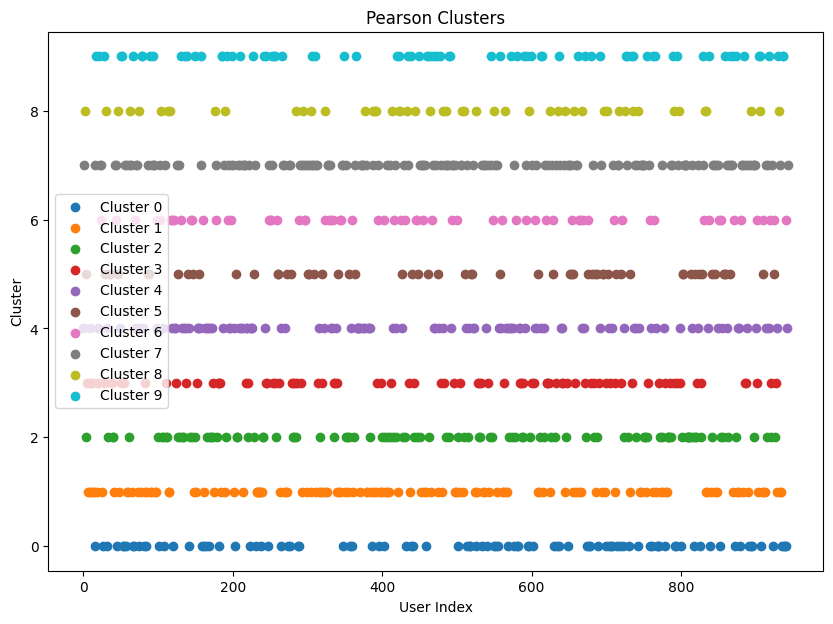

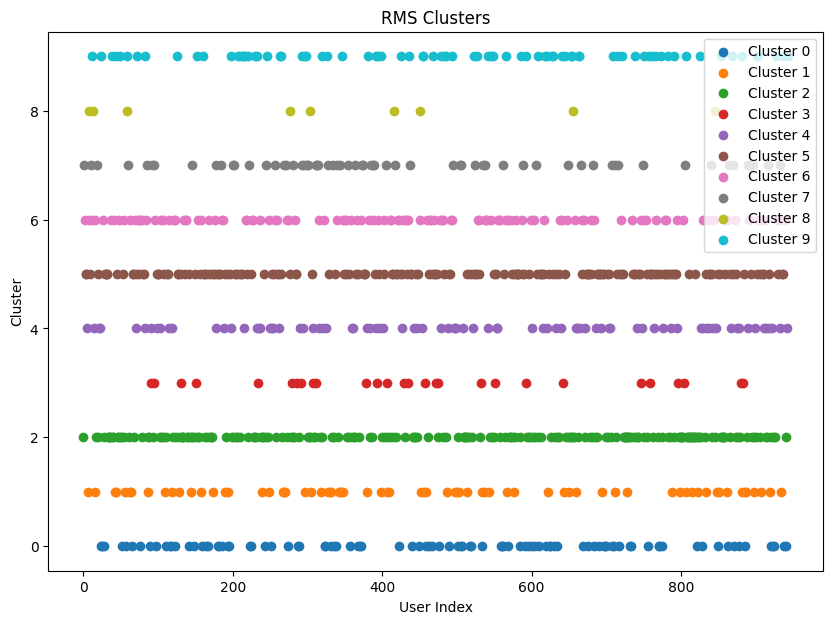

In [24]:
import joblib
import numpy as np
import matplotlib.pyplot as plt

# Load pre-trained clusters
pearson_clusters = joblib.load('pearson_clusters.pkl')
rms_clusters = joblib.load('rms_clusters.pkl')

def plot_clusters(clusters, title):
    plt.figure(figsize=(10, 7))
    unique_clusters = np.unique(clusters)
    for cluster in unique_clusters:
        cluster_indices = np.where(clusters == cluster)
        plt.scatter(cluster_indices, [cluster] * len(cluster_indices[0]), label=f'Cluster {cluster}')
    plt.title(title)
    plt.xlabel('User Index')
    plt.ylabel('Cluster')
    plt.legend()
    plt.show()

# Plot Pearson clusters
plot_clusters(pearson_clusters, 'Pearson Clusters')

# Plot RMS clusters
plot_clusters(rms_clusters, 'RMS Clusters')

_______________________________

## Matrix Factorization Using SVD

In [25]:
from scipy.sparse.linalg import svds
from sklearn.decomposition import NMF
from sklearn.exceptions import ConvergenceWarning
import warnings
user_item_matrix = merged_dataset.pivot_table(index='user_id', columns='title', values='rating', fill_value=0)

In [26]:
def svd_recommender(user_item_matrix, user_id, k=50):
    # Convert to numpy array
    matrix = user_item_matrix.values
    
    # Normalize the user-item matrix
    user_item_mean = np.mean(matrix, axis=1)
    matrix_normalized = matrix - user_item_mean[:, np.newaxis]

    # Perform SVD
    U, sigma, Vt = svds(matrix_normalized, k=k)

    # Reconstruct the matrix
    sigma_diag = np.diag(sigma)
    reconstructed_matrix = np.dot(np.dot(U, sigma_diag), Vt) + user_item_mean[:, np.newaxis]

    # Get recommendations for the user
    user_index = user_item_matrix.index.get_loc(user_id)
    user_predictions = reconstructed_matrix[user_index]
    
    # Get movies the user hasn't rated
    unrated_movies = user_item_matrix.columns[user_item_matrix.loc[user_id] == 0]
    
    # Sort predictions and get top recommendations
    recommendations = pd.Series(user_predictions, index=user_item_matrix.columns)
    recommendations = recommendations[unrated_movies].sort_values(ascending=False).head(5)
    
    return recommendations


____________________

## Main Driver Code

In [27]:
while True:
    print("\n1. Count Users\n2. Count Movies\n3. Display User Information\n4. Display Movie Name\n5. Recommend Movie\n6. Exit\n")
    choice = int(input("Choose one of the following options: "))

    if choice == 1:
        print(f"The number of unique users in the dataset is: {unique_users}")
    elif choice == 2:
        print(f"The number of unique movie titles in the dataset is: {unique_titles}")
    elif choice == 3:
        user_id = int(input("Enter the User ID: "))
        user_info = dataset[dataset.user_id == user_id]
        if not user_info.empty:
            print("The information of the user is:")
            print(user_info)
        else:
            print(f"No information found for User ID {user_id}")
    elif choice == 4:
        movie_id = int(input("Enter the Movie ID: "))
        movie_name = titles[titles.item_id == movie_id]
        if not movie_name.empty:
            print(f"The name of the movie is: {movie_name.iloc[0]['title']}")
        else:
            print(f"No movie found with Movie ID {movie_id}")
    elif choice == 5:
        user_id = int(input("Enter the User ID: "))
        print(f"\nRecommended movies for user {user_id} are:")
        
        # Get recommendations using collaborative filtering
        recommendations_pearson, recommendations_rms = recommend(user_id)
        
        print("Collaborative Filtering:")
        print("Pearson:")
        print(recommendations_pearson)
        # for i, movie in enumerate(recommendations_pearson, 1):
        #     print(f"{i}. {movie}")
        
        print("RMS:")
        print(recommendations_rms)
        # for i, movie in enumerate(recommendations_rms, 1):
        #     print(f"{i}. {movie}")
        
        # Get recommendations using SVD
        print("Matrix Factorization:")
        print("SVD:")
        recommendations_svd = svd_recommender(user_item_matrix, user_id)
        for i, (movie, score) in enumerate(recommendations_svd.items(), 1):
            print(f"{i}. {movie} (Predicted Rating: {score:.2f})")

        print("Popular Movies :")
        print(recommend_popular())
    elif choice == 6:
        print("Exiting...")
        break
    else:
        print("Invalid Choice")
        continue


1. Count Users
2. Count Movies
3. Display User Information
4. Display Movie Name
5. Recommend Movie
6. Exit


Recommended movies for user 100 are:
MSE Error for Pearson recommendations for user 100: 0.6919688299901987
MSE Error for RMS recommendations for user 100: 0.7895669726761789
Collaborative Filtering:
Pearson:
['Paradise Lost: The Child Murders at Robin Hood Hills (1996)', 'Return of the Jedi (1983)', 'Event Horizon (1997)', 'Edge, The (1997)', "Schindler's List (1993)"]
RMS:
['Paradise Lost: The Child Murders at Robin Hood Hills (1996)', 'Return of the Jedi (1983)', 'Event Horizon (1997)', 'Edge, The (1997)', "Schindler's List (1993)"]
Matrix Factorization:
SVD:
1. Devil's Advocate, The (1997) (Predicted Rating: 2.62)
2. In & Out (1997) (Predicted Rating: 1.90)
3. Edge, The (1997) (Predicted Rating: 1.88)
4. Saint, The (1997) (Predicted Rating: 1.86)
5. Kiss the Girls (1997) (Predicted Rating: 1.76)
Popular Movies :
["Schindler's List (1993)", 'Shawshank Redemption, The (1994)

_________________